In [1]:
#step1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Ignore harmless warnings
import  warnings
warnings.filterwarnings("ignore")
#set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#To run sql queries on DataFrame
import pandasql as psql

In [2]:
#step2
# Load the bank data
loan= pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\loan_data.csv", header = 0)
#copy the back-up files
loan_bk=loan.copy()
#display bank data
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#step3
#dispaly data set information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan=loan.rename(columns={'not.fully.paid':'NFPaid'},inplace=False)
loan_BK1=loan.copy()
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
#STEP4
#count the target or dependent variable by 0 AND 1 AND THEIR PROPORTION
#(>=10:1, THEN THE DATSET IS IMBALANCE DATA)
loan_count=loan.NFPaid.value_counts()
print("class0:" ,loan_count[0])
print("class1:" ,loan_count[1])
print("prportion:" ,round(loan_count[0]/loan_count[1],2),":1")
print("total bank records:" ,len(loan))

class0: 8045
class1: 1533
prportion: 5.25 :1
total bank records: 9578


In [6]:
#step5
#dispalying duplicate values in data set
loandup=loan[loan.duplicated(keep="last")]
#display duplicate records
loandup

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid


In [7]:
#step6
#identify missing values  in  the variables
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
NFPaid               0
dtype: int64

In [8]:
#STEP7
#dispaly all columns in data set
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'NFPaid'],
      dtype='object')

In [9]:
loan['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan['purpose']=LE.fit_transform(loan[['purpose']])

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  NFPaid             9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


In [12]:
IndepVar = []
for col in loan.columns:
    if col != 'NFPaid':
        IndepVar.append(col)

TargetVar = 'NFPaid'
x = loan[IndepVar]
y = loan[TargetVar]

In [13]:
mm_cols=['int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [14]:
# Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Display the shape for train & test data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6704, 13), (2874, 13), (6704,), (2874,))

In [15]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
#x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
#x_test = mmscaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test)

In [16]:
#train the algorithm and build the model with train dataset
from sklearn.ensemble import RandomForestClassifier
#create an aobject for decision model
ModelRF = RandomForestClassifier()
#train the model with training dataset
ModelRF.fit(x_train,y_train)
#predict the model with test dataset 
y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

In [17]:
#to display the algorithm paramaters
params = ModelRF.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Confusion matrix : 
 [[   9  457]
 [  13 2395]]
Outcome values : 
 9 457 13 2395
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.02      0.04       466
           0       0.84      0.99      0.91      2408

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

Accuracy : 83.6 %
Precision : 40.9 %
Recall : 1.9 %
F1 Score : 0.037
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 50.7 %
MCC : 0.059
roc_auc_score: 0.507


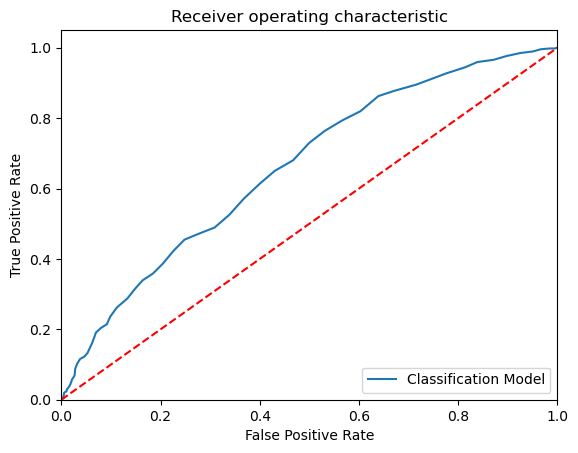

-----------------------------------------------------------------------------------------------------


In [18]:
# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)




# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)



# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [19]:
#display the final results 
Results = pd.DataFrame({'NFPaid_A':y_test, 'NFPaid_P':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = loan_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
ResultsFinal['%Error'] = round(((ResultsFinal['NFPaid_A']-ResultsFinal['NFPaid_P'])/ResultsFinal['NFPaid_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,NFPaid_A,NFPaid_P,%Error
4048,1,all_other,0.1284,268.95,10.308953,4.28,687,4949.958333,1602,76.3,0,0,0,0,0,0,NaN
9282,0,debt_consolidation,0.1531,174.08,10.491274,3.23,667,4770.000000,2910,63.3,4,0,0,0,0,0,NaN
1680,1,home_improvement,0.0800,225.62,11.709495,7.29,752,2913.000000,16405,21.1,0,0,0,0,0,0,NaN
6462,1,credit_card,0.1183,646.12,11.140411,16.44,737,6570.000000,27414,62.4,2,0,0,0,0,0,NaN
9294,0,home_improvement,0.1426,171.53,11.222520,9.56,682,10889.958330,2470,39.2,6,0,1,0,0,0,NaN


In [20]:
# decision tree model with random sampling
from sklearn.tree import DecisionTreeClassifier
#create obj for model
ModelDT= DecisionTreeClassifier()
#ModelLR=LogisticRegression(penalty='l2',dyual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,multi_class="auto",verbose=0,warm_state=False,n_jobs=None,l1_ratio=None)
ModelDT.fit(x_train,y_train)

y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)



In [21]:
#to dispaly the algorithm hyper parameters
params=ModelDT.get_params()
print(params)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


confusion_matrix:
 [[ 129  337]
 [ 451 1957]]
outcome values:
 129 337 451 1957
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.28      0.25       466
           0       0.85      0.81      0.83      2408

    accuracy                           0.73      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.73      0.74      2874

Accuracy : 72.6 %
Precision : 22.2 %
Recall : 27.7 %
F1 Score : 0.247
Specificity or True Negative Rate : 81.3 %
Balanced Accuracy : 54.5 %
MCC : 0.082
roc_auc_score: 0.545


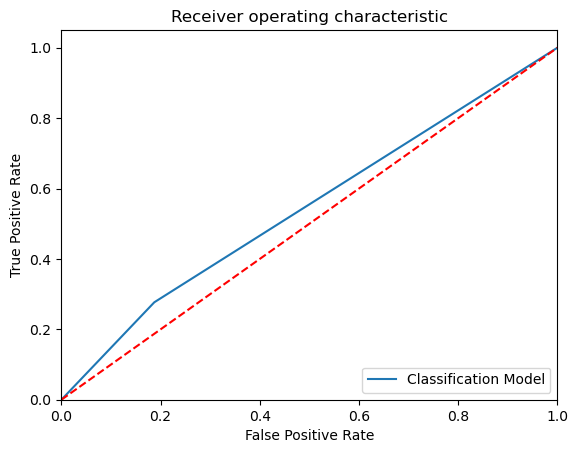

-----------------------------------------------------------------------------------------------------


In [22]:
#confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predicted  values
predicted=y_pred
#confusin matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion_matrix:\n",matrix)
#outcomes values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:\n",tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [23]:
Results = pd.DataFrame({'NFPaid_A':y_test, 'NFPaid_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = loan_bk.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,NFPaid_A,NFPaid_P
815,1,all_other,0.1134,329.00,10.819778,12.05,692,1620.000000,13744,62.2,0,0,0,0,0,0
3495,1,credit_card,0.1505,346.92,12.072541,5.99,662,3840.958333,6204,27.8,1,0,0,0,0,0
4602,1,debt_consolidation,0.1774,720.42,11.314475,2.87,677,4290.958333,9603,51.9,0,1,0,1,1,0
483,1,all_other,0.0800,188.02,10.778956,14.08,792,4890.041667,2573,16.3,1,0,0,0,0,0
1195,1,all_other,0.1001,71.00,10.981080,10.80,702,2520.000000,1051,58.4,1,0,0,0,0,0


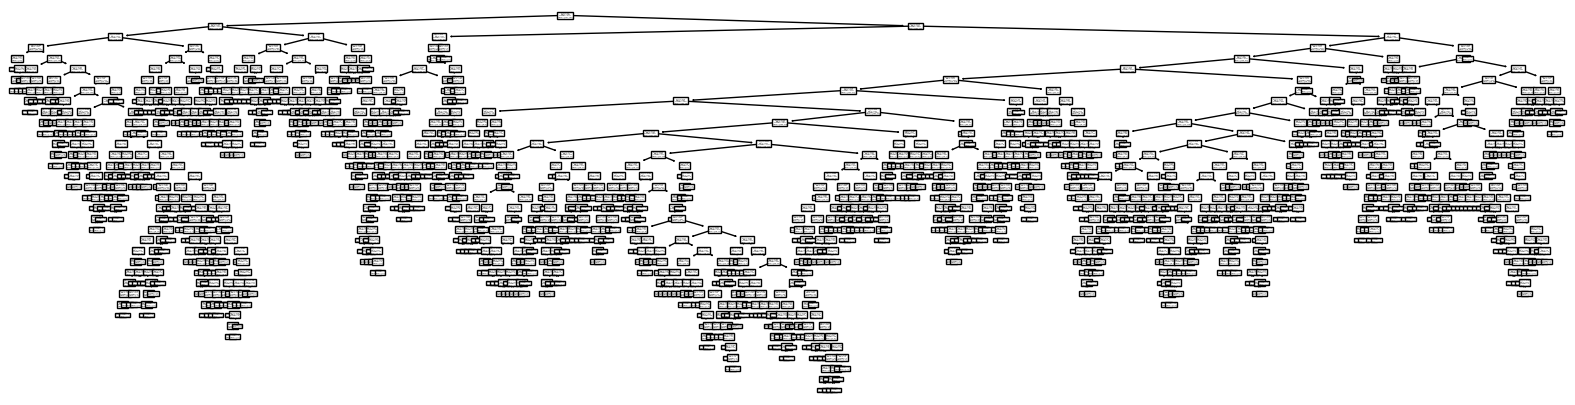

In [24]:
#PLOT THE DECISION TREE
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);

In [25]:
# logistic regression algo
from sklearn.linear_model import LogisticRegression
#create obj for model
ModelLR=LogisticRegression()
#ModelLR=LogisticRegression(penalty='l2',dyual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,multi_class="auto",verbose=0,warm_state=False,n_jobs=None,l1_ratio=None)
ModelLR.fit(x_train,y_train)

y_pred=ModelLR.predict(x_test)
y_pred_prob=ModelLR.predict_proba(x_test)

In [26]:
#to dispaly the algorithm hyper parameters
params=ModelLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


confusion_matrix:
 [[   9  457]
 [   8 2400]]
outcome values:
 9 457 8 2400
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.02      0.04       466
           0       0.84      1.00      0.91      2408

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874

Accuracy : 83.8 %
Precision : 52.9 %
Recall : 1.9 %
F1 Score : 0.037
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 50.8 %
MCC : 0.077
roc_auc_score: 0.508


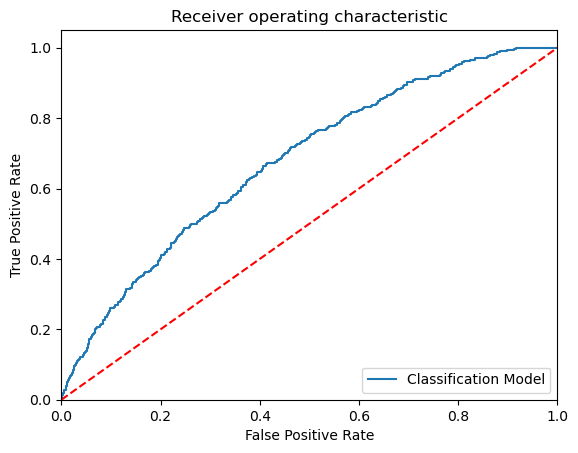

-----------------------------------------------------------------------------------------------------


In [27]:
#confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predicted  values
predicted=y_pred
#confusin matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion_matrix:\n",matrix)
#outcomes values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:\n",tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [28]:
Results = pd.DataFrame({'NFPaid_A':y_test, 'NFPaid_P':y_pred})
#Results = pd.DataFrame({_A':y_test, 'CreditCard_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = loan_bk.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,NFPaid_A,NFPaid_P
4698,1,all_other,0.1218,249.75,11.289782,2.77,717,3630.000000,653,19.8,2,0,0,0,0,0
1427,1,credit_card,0.0938,191.87,10.714418,10.69,742,2760.000000,1774,13.3,1,0,0,0,0,0
7105,1,all_other,0.0988,309.22,10.373491,17.06,732,4475.000000,8153,62.7,1,0,0,0,0,0
5328,1,major_purchase,0.1357,67.94,10.491274,7.83,667,3509.958333,1790,34.4,0,0,0,0,0,0
6715,1,debt_consolidation,0.0894,460.69,10.839581,10.96,777,6399.041667,1461,3.1,0,0,0,0,0,0
